# Video Game Sales Data Analysis

## Table of Contents <a id='back'></a>

* [1. Introduction](#intro)
* [2. Initiation](#init)
* [3. Data Loading](#load)
* [4. Data Validation](#overview)
    * [4.1. Understanding Data](#review)
	* [4.2. Data Cleaning](#clean)
	* [4.3. Improving Data Quality](#imp)
* [5. Data Analysis](#eda)
	* [5.1. Identify Whether The Number of Games Released Each Year Differ Significantly](#1)
	* [5.2. Understanding Platform Dynamics](#2)
	* [5.3. Deciding The Period of Time That Will Be Used to Forecast The Future](#3)
	* [5.4. Understanding The Association Between Genre and Sales Amounts](#4)
    * [5.5. Understanding The Association Between User Reviews or Critic Reviews and Sales Amounts](#5)
* [6. Data Profiling by Region](#prof)
	* [6.1. By Platform](#prof1)
	* [6.2. By Genre](#prof2)
	* [6.3. ESRB Rating vs. Sales Amounts](#prof3)
* [7. Hypothesis Testing](#ht)
* [8. General Conclusion](#end)

## 1. Introduction <a id='intro'></a>

### 1.1. Project Description

You work at the online store "Ice" that sells video games from around the world. Data related to user and expert reviews, genres, platforms (such as Xbox or PlayStation), and historical game sales data are available from open sources. Your task is to identify patterns that determine whether a game can be considered successful or not. By doing so, you can discover the most promising games and plan their advertising campaigns.

You have data available from the year 2016. Let's imagine that it is now December 2016, and you are planning the campaign for the year 2017.

### 1.2. Objectives

The objectives of this research is as stated below:
1. Identify whether the number of games released each year differ significantly.
2. Identify platform dynamics
    * Identify which platform will grow and which will shrink.
    * Identify which platform that is previously popular but not anymore.
    * Identify how much time is needed for new platform to outshine old platform.
    * Identify whether the number of games sold differ significantly between platforms.
        * If so, which platform sold the most, plot the distribution of the sales amount for that platform.
    * Decide which platform will optimize profit.
3. Decide the period of time that will be used to forecast the future (in this case 2017).
4. Identify whether the sales amounts differ significantly between genres. If so, decide which genre is the most profitable. Decide whether we can generalize the association between genre and sales amounts.
5. Identify whether there is an association between user reviews or critic reviews and sales amount in a pre-selected platform. Compare the conclusion with another platform.
6. Perform profiling for each region:
    * Show top 5 platform and decide the variability between them.
    * Show top 5 genre and describe the difference.
    * Decide whether ESRB rating influences sales amounts in each region.
7. Test these hypothesis:
    * Average user rating for *Xbox One* and *PC* platform is the same.
    * Average user rating for *Action* and *Sports* genre is different.

### 1.3. Data Description

In this research, we will analyze games data from across the world. The dataset used contains this information:
* Name
* Platform
* Year_of_Release
* Genre
* NA_sales (# of sales in North America in million USD)
* EU_sales (# of sales in Europe in million USD)
* JP_sales (# of sales in Japan in million USD)
* Other_sales (# of sales in other countries in million USD)
* Critic_Score (max. 100)
* User_Score (max. 100)
* Rating (ESRB)

The data used is those available in 2016.

### 1.4. Methodology

The research will be conducted in several stages as stated below:
1. Project description
2. Initial data exploration
3. Cleaning data
    * Datatype validation
    * Managing duplicate and redundant data
    * Dealing with missing data    
    * Removing outliers
4. Improving data quality
    * Recoding variables
    * Deriving new variables
5. Data analysis
6. Data profiling
7. Testing hypothesis
8. Conclusion

[back to table of contents](#back)

## 2. Initiation <a id='init'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## 3. Data Loading <a id='load'></a>

In [2]:
df = pd.read_csv('datasets/games.csv')

[back to table of contents](#back)

## 4. Data Validation <a id='overview'></a>

### 4.1. Understanding Data <a id='review'></a>

In [3]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


From these first 5 rows, we can see that there are several missing values in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


There are 16715 rows and 11 columns.<br>
Out of the 11 columns, missing data are found in 6 columns:
* Name
* Year_of_Release
* Genre
* Critic_Score
* User_Score
* Rating

There are 1 column with wrong datatype:
* User_Score, should be continuous number

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


From this initial description, we can see that the year of release ranges from 1980 to 2016.

### 4.2. Data Cleaning <a id='clean'></a>

#### 4.2.1. Changing Column Names

In order to maintain consistency, column names are changed to lowercase and removed from potentially hiding spaces(" ").

In [6]:
df.columns = df.columns.str.strip().str.lower()

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### 4.2.2. Datatype Validation

##### 4.2.2.1. Checking Unique Values for Each Column

In [8]:
for col in df.columns:
    if 'sales' not in col:
        print(col)
        print(df[col].unique())
        print()

name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

year_of_release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

critic_score
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43

There is one value with specification mismatch in user_score column which is 'tbd'. As changing the score to 0 is not suitable, we will change it to NaN.

##### 4.2.2.2. Changing Datatype

In [9]:
#year_of_release missing values is filled with 0 first so that we can change its datatype
df['year_of_release'].fillna(0, inplace = True)

df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

In [10]:
df[['year_of_release','user_score']].dtypes

year_of_release      int32
user_score         float64
dtype: object

#### 4.2.3. Managing Duplicate and Redundant Data

In [11]:
df[df.duplicated() == 'True']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


There is no duplicated data.

#### 4.2.4. Dealing with missing data

##### 4.2.4.1. Calculating the Percentages of Missing Data by Columns

In [12]:
percentage_missing = df['name'].isna().sum() / df.shape[0]
print(f"Percentage of missing value in NAME column = {percentage_missing*100:.2f} %")

Percentage of missing value in NAME column = 0.01 %


Because the percentage of data missing in **name** column is small, we will remove them from this dataset.

In [13]:
percentage_missing = df[df['year_of_release']==0].shape[0] / df.shape[0]
print(f"Percentage of missing value in YEAR_OF_RELEASE column = {percentage_missing*100:.2f} %")

Percentage of missing value in YEAR_OF_RELEASE column = 1.61 %


There are roughly 1.6% of data missing in **year_of_release** column. Because the percentage is small, we will just remove these data.

In [14]:
percentage_missing = df['genre'].isna().sum() / df.shape[0]
print(f"Percentage of missing value in GENRE column = {percentage_missing*100:.2f} %")

Percentage of missing value in GENRE column = 0.01 %


Because the percentage of data missing in **genre** column is small, we will remove them from this dataset.

In [15]:
percentage_missing = df['critic_score'].isna().sum() / df.shape[0]
print(f"Percentage of missing value in CRITIC_SCORE column = {percentage_missing*100:.2f} %")

Percentage of missing value in CRITIC_SCORE column = 51.32 %


In [16]:
percentage_missing = df['user_score'].isna().sum() / df.shape[0]
print(f"Percentage of missing value in USER_SCORE column = {percentage_missing*100:.2f} %")

Percentage of missing value in USER_SCORE column = 54.59 %


In [17]:
percentage_missing = df['rating'].isna().sum() / df.shape[0]
print(f"Percentage of missing value in RATING column = {percentage_missing*100:.2f} %")

Percentage of missing value in RATING column = 40.48 %


##### 4.2.4.2. Taking actions for missing data

###### Name Column

In [18]:
df = df[df['name'].notnull()]

In [19]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


###### Year_of_Release Column

In [20]:
df = df[df['year_of_release']!=0]

In [21]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


###### Genre Column

In [22]:
df = df[df['genre'].notnull()]

In [23]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


###### Critic_Score Column

As the percentage of missing data for this column is large, imputation using mean, median, mode is not a good option as it will distort the data by a large amount to the center. Pairwise deletion is the best option to use so that we can preserve as much information as possible for the analysis.

###### User_Score Column

As the percentage of missing data for this column is large, imputation using mean, median, mode is not a good option as it will distort the data by a large amount to the center. Pairwise deletion is the best option to use so that we can preserve as much information as possible for the analysis.

###### Rating Column

As the percentage of missing data for this column is large, imputation using mode is not a good option as it will distort the data by a large amount to the value with the most occurrence. Pairwise deletion is the best option to use so that we can preserve as much information as possible for the analysis.

##### Taking actions for outliers

Outliers will be remove accordingly before we do hypothesis testing.

### 4.3. Improving Data Quality <a id='imp'></a>

#### 4.3.1. Deriving New Variables

Deriving `total_sales` variable.

In [24]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Deriving `standardized_critic_score` variable.

In [25]:
mean = df['critic_score'].mean(skipna = True)
stdev = df['critic_score'].std(ddof=0, skipna = True)

In [26]:
mean

68.99436302142053

In [27]:
stdev

13.91918815393271

Deriving `standardized_critic_score` variable.

In [28]:
df['std_critic_score'] = df['critic_score'].apply(lambda x: (x-mean)/stdev)

Deriving `standardized_user_score` variable.

In [29]:
filtered_df = df[df['user_score'].notnull()]
filtered_df = filtered_df[filtered_df['user_score'] != 'tbd']
filtered_df['user_score'] = pd.to_numeric(filtered_df['user_score'])

In [30]:
mean = filtered_df['user_score'].mean()
stdev = filtered_df['user_score'].std(ddof=0)

In [31]:
df['std_user_score'] = df['user_score'].apply(lambda x: (x-mean)/stdev)

Current dataset state.

In [32]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,std_critic_score,std_user_score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,0.503308,0.582701
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,0.934367,0.782788
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,0.790681,0.582701
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,NaN,NaN


[back to table of contents](#back)

## 5. Data Analysis <a id='eda'></a>

### 5.1. Identify Whether The Number of Games Released Each Year Differ Significantly <a id='1'></a>

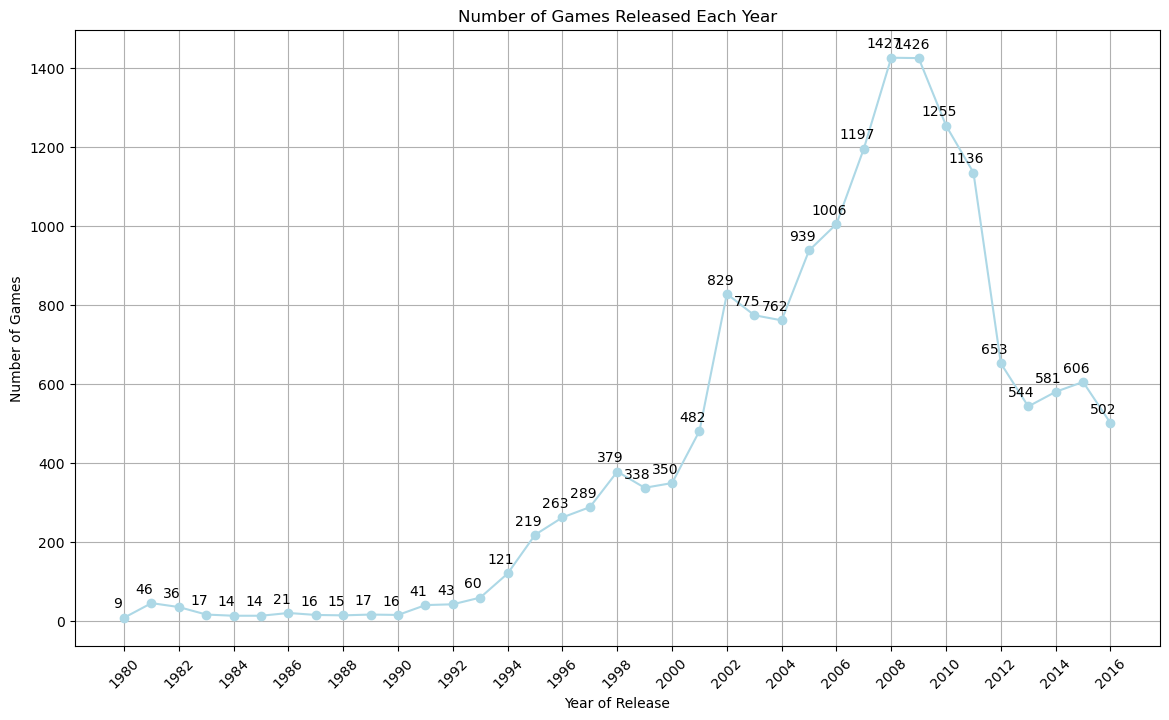

In [33]:
plt.figure(figsize=(14,8))
a = df.groupby('year_of_release')['name'].count().plot(style='-o', grid=True, color='lightblue')

for x, y in zip(a.get_lines()[0].get_xdata(), a.get_lines()[0].get_ydata()):
    a.annotate(f'{y:.0f}', xy=(x,y), xytext=(-5, 10), textcoords='offset points', ha='center', va='center')            
    
plt.title('Number of Games Released Each Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(np.arange(1980,2018,2), rotation=45)
plt.show()

As we can see on the chart, the number of games released each year differ significantly ranging from 9 games in the year 1980 to 1427 games in 2008. It shows that there is a steady increase in the number of games from 1980 until 2008 and then followed by a decrease from 2008 until 2016.

[back to table of contents](#back)

### 5.2. Understanding Platform Dynamics <a id='2'></a>

#### 5.2.1. By Games Released

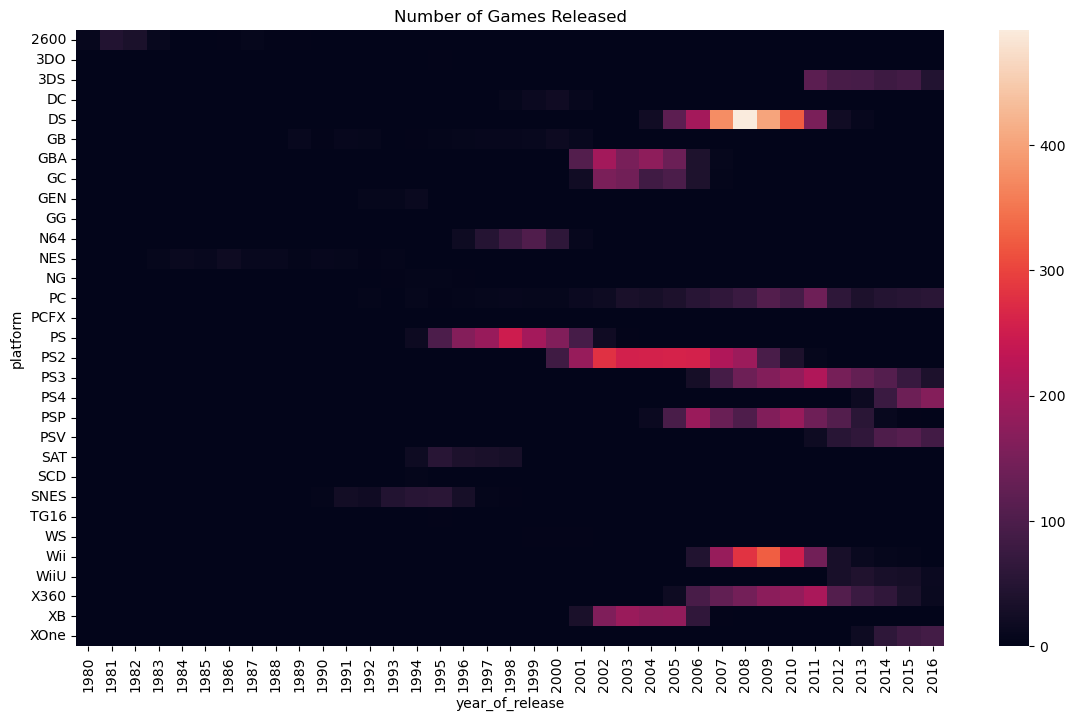

In [34]:
plt.figure(figsize=(14,8))
sns.heatmap(data = df.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count').fillna(0))
plt.title('Number of Games Released')
plt.show()

From the heatmap above we can see that in terms of games released, there is only noted increase since 1990.<br>
PS platforms show a steady transition in number of games released from PS1 to PS4 with PS1 dominating since 1995 to 2002, PS2 since 2000 until 2011, PS3 since 2006 until 2016, and PS4 since 2014 until now. The trend for PS4 seems to be still increasing.
PSP and PSVita also show a trend of transition with PSP dominating from 2005 until 2013, and PSVita from 2012 until now. But the trend seems to be decreasing for PSVita.
Nintendo platforms also show a steady transition in this order: N64, GBA, DS, and 3DS. N64 dominating since 1996 until 2000, GBA since 2001 until 2006, DS since 2004 until 2011, and 3DS since 2011 until 2016. The trend for 3DS seems to be decreasing at the end of the period.
Wii and WiiU also show a trend of transition with Wii dominating from 2006 until 2012, and WiiU from 2012 until 2015. But the later platform seems to not succeeding as well as its predecessor.
XB, X360, and XOne also show a trend of transition with XB dominating from 2002 until 2006, and X360 from 2006 until 2014, and XOne from 2014 until now. XOne seems to be stable in terms of number of games released.

From this map, we can also see that it typically takes as long as 6 until 9 years for a platform to outshines its predecessor.

From the heatmap we can also see that DS platform outshines the other in term of number of games released.

#### 5.2.2. By Games Sold

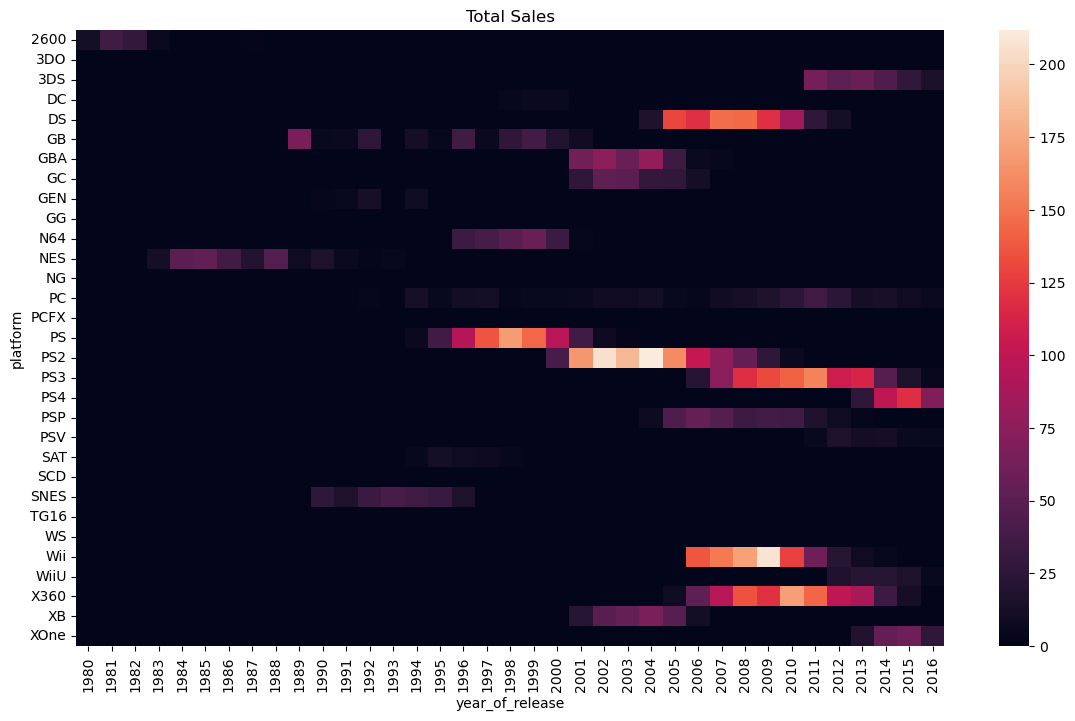

In [35]:
plt.figure(figsize=(14,8))
sns.heatmap(data = df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum').fillna(0))
plt.title('Total Sales')
plt.show()

Based on the heatmap above, we can see that there are only several platform left that seems to be active which are PS4, 3DS, and XOne. PS4 seems to be still popular, and both 3DS and XOne seems to be decreasing in sales generated.

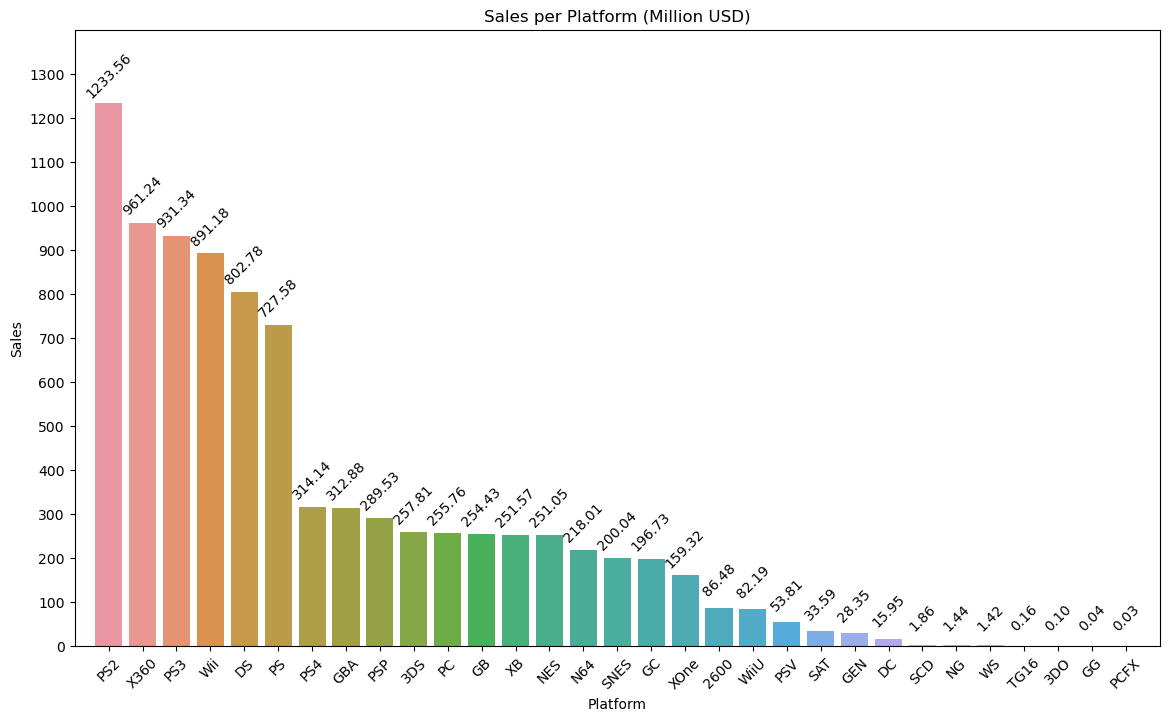

In [36]:
plt.figure(figsize=(14,8))
b = sns.barplot(data = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').
                sort_values(by = 'total_sales', ascending = False).reset_index(),
                x = 'platform', y= 'total_sales')

for elem in b.patches:
    b.annotate(f'{elem.get_height():.2f}',
                   (elem.get_x() + elem.get_width() / 2., elem.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=45, textcoords = 'offset points')
    
plt.axis([-1,31,0,1400])
plt.title('Sales per Platform (Million USD)')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.xticks(rotation = 45)
plt.yticks(np.arange(0, 1400, 100))
plt.show()

As we can see from this chart, the number of games sold differ significantly between each platform. The sales amount ranging from 0.03 million games sold on PCFX platform to 1233.56 million games sold on PS2.

##### 5.2.2.1. PS2 Distribution

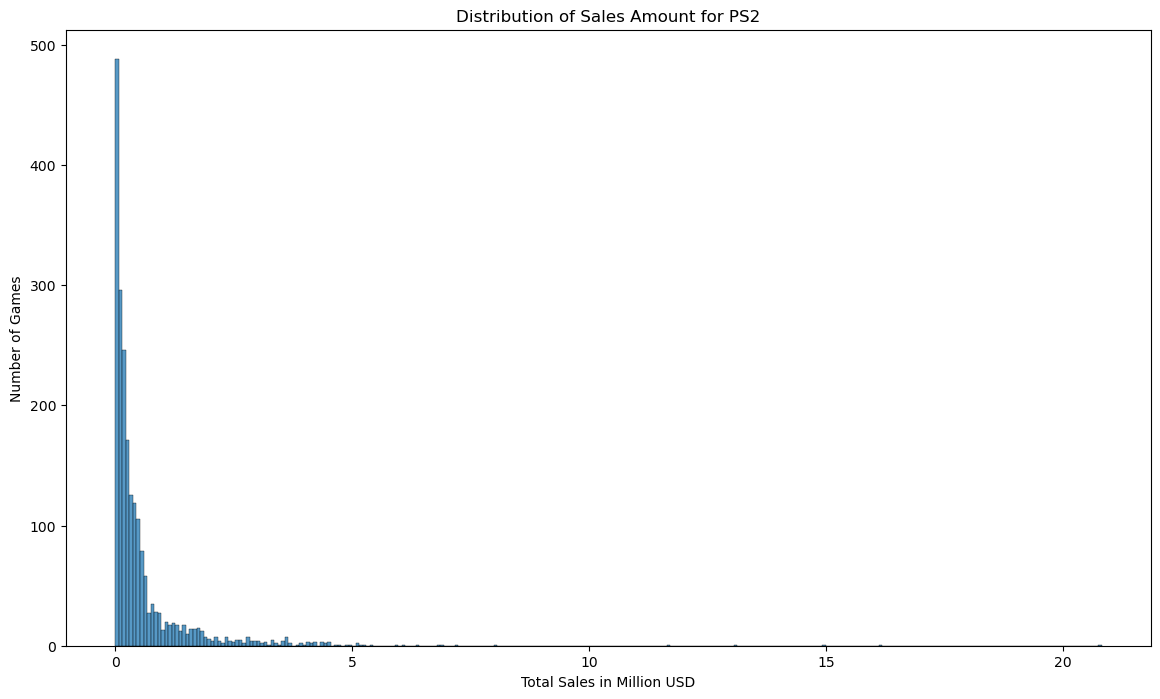

In [37]:
plt.figure(figsize=(14,8))
sns.histplot(df[df['platform']=='PS2']['total_sales'])
plt.title('Distribution of Sales Amount for PS2')
plt.xlabel('Total Sales in Million USD')
plt.ylabel('Number of Games')
plt.show()

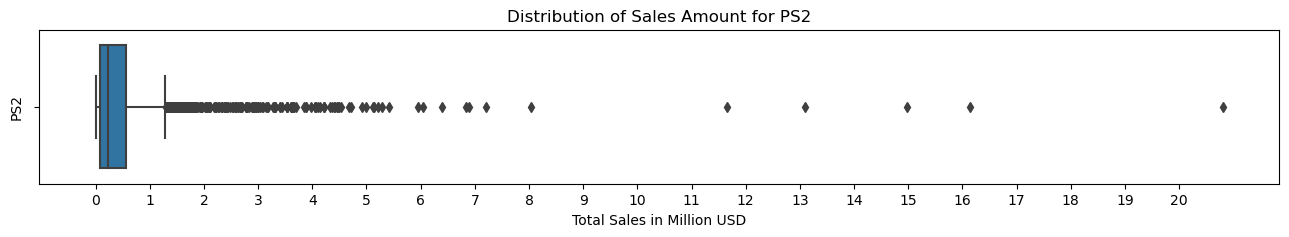

In [38]:
plt.figure(figsize=(16,2))
c = df[df['platform']=='PS2']['total_sales']
sns.boxplot(x = c.values)
plt.title('Distribution of Sales Amount for PS2')
plt.xlabel('Total Sales in Million USD')
plt.ylabel('PS2')
plt.xticks(np.arange(0,21))
plt.show()

In [39]:
d = c.describe()
d

count    2127.000000
mean        0.579953
std         1.138461
min         0.000000
25%         0.080000
50%         0.230000
75%         0.560000
max        20.810000
Name: total_sales, dtype: float64

In [40]:
IQR = d['75%']-d['25%']
IQR

0.48000000000000004

In [41]:
lower_bound = d['25%'] - 1.5*IQR
upper_bound = d['75%'] + 1.5*IQR
lower_bound, upper_bound

(-0.6400000000000001, 1.2800000000000002)

After plotting the distribution of platform with the most number of sales, we can see that there are many outliers that generate more than 1.28 million USD with max 20.81 million USD. Typically, the amount generated from a game for PS2 platform ranging from 0.08 until 0.56 million USD (based on Q1-Q3) with the median (Q2) equals to 0.23 million USD.

#### Conclusion

Key takeaways:
* From the 3 platform that are still active, PS4 seems to be growing, and both 3DS and XOne seems to be shrinking in terms of revenue generated and games released.
* GBA, DS, PS, PS2, PS3, XBox, and X360 were previously very popular but not anymore.
* Generally speaking, approximately 6-9 years are needed for new platform to outshine old platform.
* The number of games sold differ significantly between platforms with PS2 and X360 leading in terms of revenue generated.
* The distribution of the most popular platform, PS2, shows that there are many games that generate way more revenue than the typical.
* For the subsequent years, PS4 is the platform of choice that will optimize profit though it may also be reasonable to release some games on 3DS or XOne to gain additional revenue.

[back to table of contents](#back)

### 5.3. Deciding The Period of Time That Will Be Used to Forecast The Future <a id='3'></a>

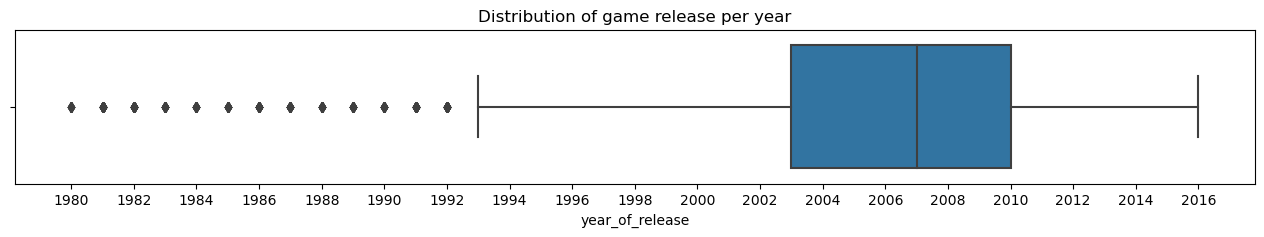

In [42]:
plt.figure(figsize=(16,2))
sns.boxplot(x = df['year_of_release'])
plt.title("Distribution of game release per year")
plt.xticks(np.arange(1980,2017,2))
plt.show()

In [43]:
lower_bound = df['year_of_release'].describe()['25%'] - 1.5*(df['year_of_release'].describe()['75%'] - df['year_of_release'].describe()['25%'])
upper_bound = df['year_of_release'].describe()['75%'] + 1.5*(df['year_of_release'].describe()['75%'] - df['year_of_release'].describe()['25%'])
lower_bound, upper_bound

(1992.5, 2020.5)

The period of time we will use to forecast the future will be from 1993 to 2016.

[back to table of contents](#back)

### 5.4. Understanding The Association Between Genre and Sales Amounts <a id='4'></a>

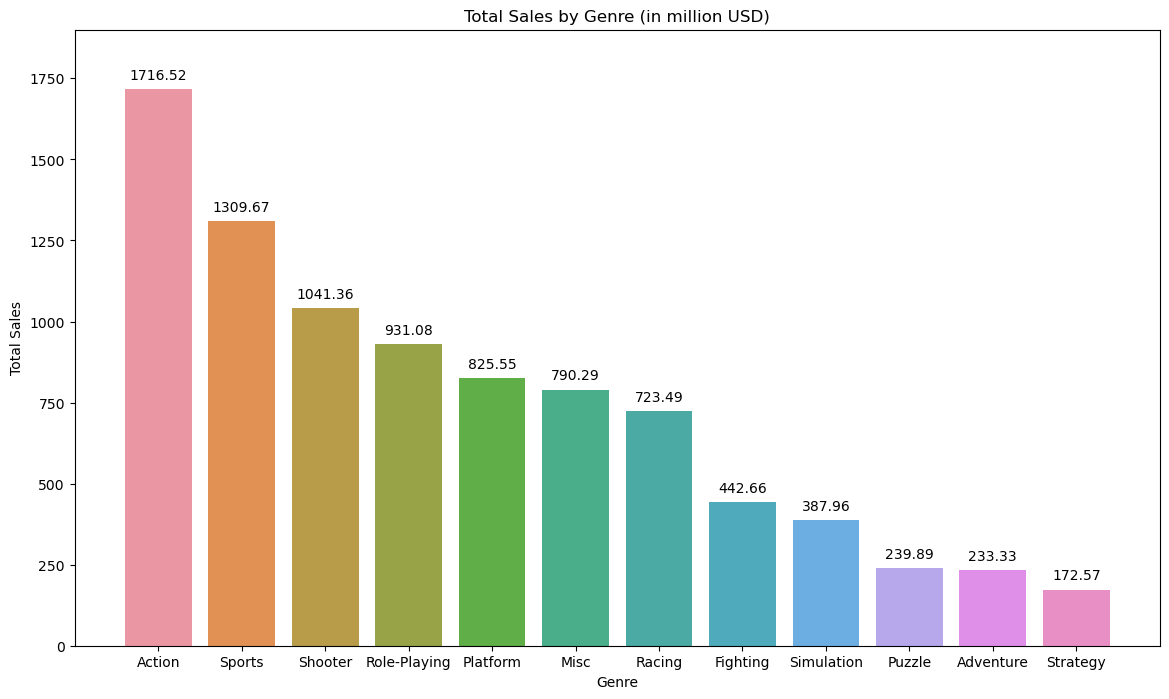

In [44]:
plt.figure(figsize = (14,8))
e = sns.barplot(data = df.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending = False),
                x = 'genre', y = 'total_sales')

for bar in e.patches:
    e.annotate(f'{bar.get_height():.2f}', (bar.get_x()+bar.get_width()/2., bar.get_height()),
               xytext=(0,10), textcoords="offset points", ha = 'center', va = 'center')

plt.axis([-1,12,0,1900])    
plt.title("Total Sales by Genre (in million USD)")
plt.xlabel("Genre")
plt.ylabel("Total Sales")
plt.show()

There are significant difference in revenue generated between genres. This chart shows that there probably is an association between genre and total sales. The revenue generated per genre ranging from 172.57 million USD for Strategy genre to 1716.52 million USD for Action genre. Action Genre generated the most revenue out of all genres. The revenue generated from this genre is up to 10 times the minimum a genre has generated.

[back to table of contents](#back)

### 5.5. Understanding The Association Between User Reviews or Critic Reviews and Sales Amounts <a id='5'></a>

To perform this analysis, we will use pairwise deletion for the missing values as stated previously.

In [45]:
filtered_df1 = df.query("critic_score.notnull() and platform == 'PS2'")
filtered_df2 = df.query("user_score.notnull() and platform == 'PS2'")
filtered_df3 = df.query("critic_score.notnull() and platform == 'DS'")
filtered_df4 = df.query("user_score.notnull() and platform == 'DS'")
filtered_df5 = df.query("critic_score.notnull() and user_score.notnull() and platform == 'PS2'")
filtered_df6 = df.query("critic_score.notnull() and user_score.notnull() and platform == 'DS'")

#### 5.5.1. Critic Score vs. Total Sales

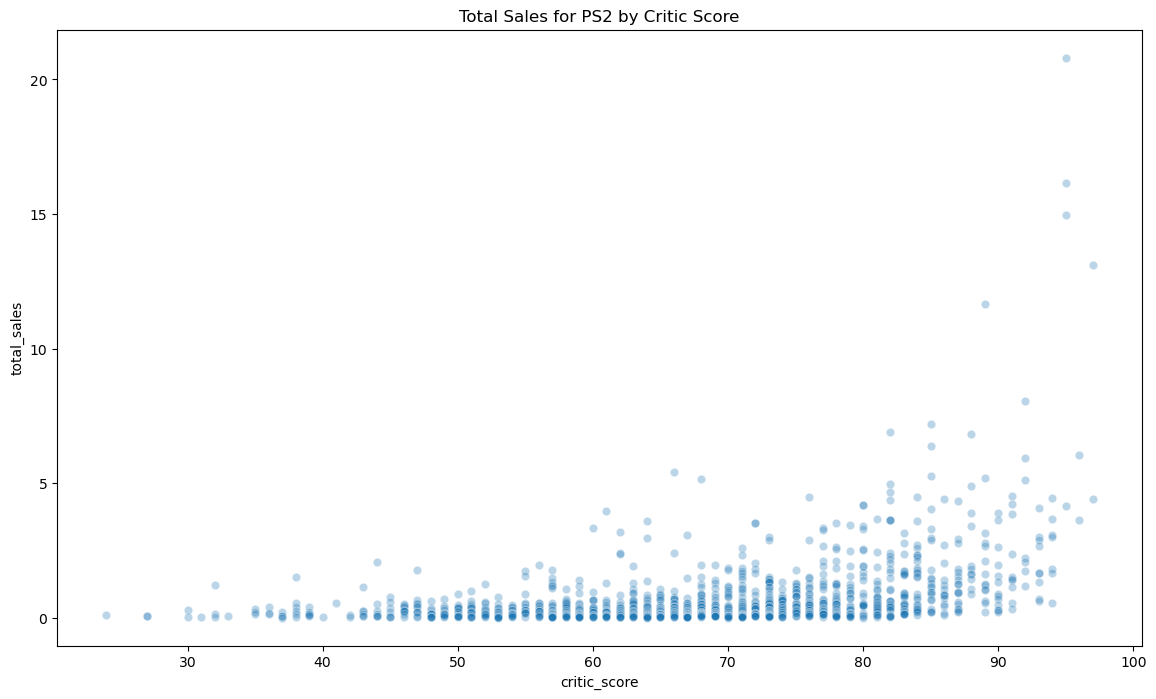

In [46]:
plt.figure(figsize=(14,8))
sns.scatterplot(data = filtered_df1, x='critic_score', y='total_sales', alpha = 0.3)
plt.title("Total Sales for PS2 by Critic Score")
plt.show()

In [47]:
filtered_df1['critic_score'].corr(filtered_df1['total_sales'])

0.3925364754450901

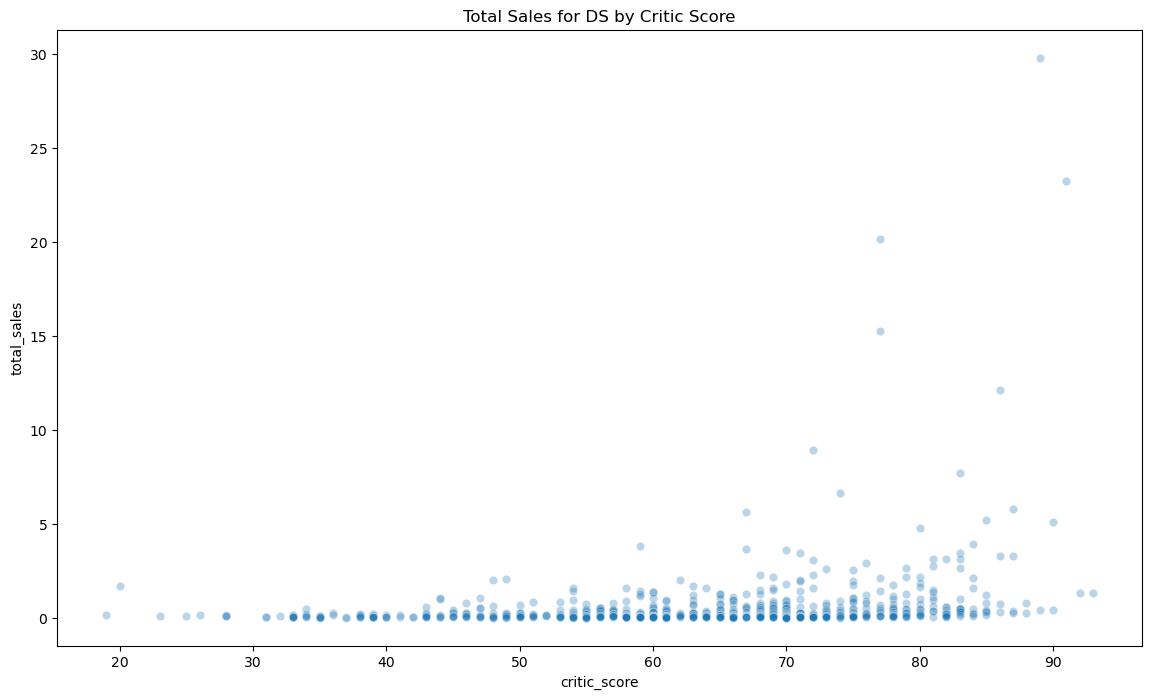

In [48]:
plt.figure(figsize=(14,8))
sns.scatterplot(data = filtered_df3, x='critic_score', y='total_sales', alpha = 0.3)
plt.title("Total Sales for DS by Critic Score")
plt.show()

In [49]:
filtered_df3['critic_score'].corr(filtered_df3['total_sales'])

0.2375457985411349

From this comparison, we can see that total sales tends to be higher with higher critic score for both DS and PS2. There may be a weak positive correlation between critic score and total sales.

#### 5.5.2. User Score vs. Total Sales

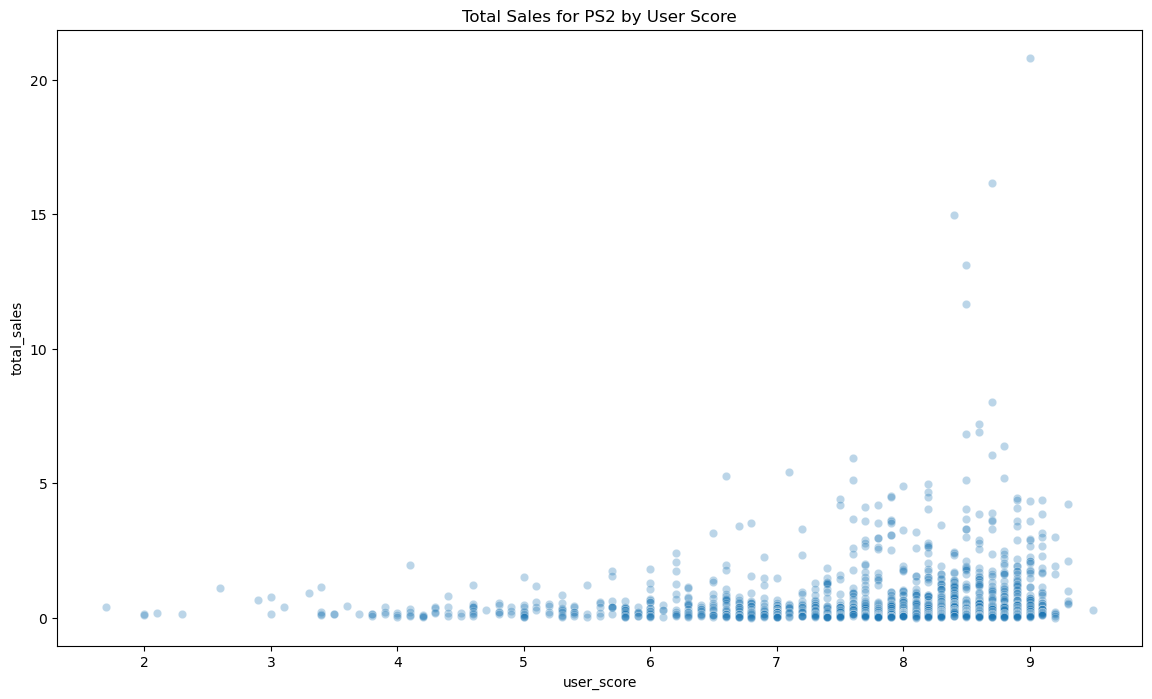

In [50]:
plt.figure(figsize=(14,8))
sns.scatterplot(data = filtered_df2, x='user_score', y='total_sales', alpha = 0.3)
plt.title("Total Sales for PS2 by User Score")
plt.show()

In [51]:
filtered_df2['user_score'].corr(filtered_df2['total_sales'])

0.1750550277038374

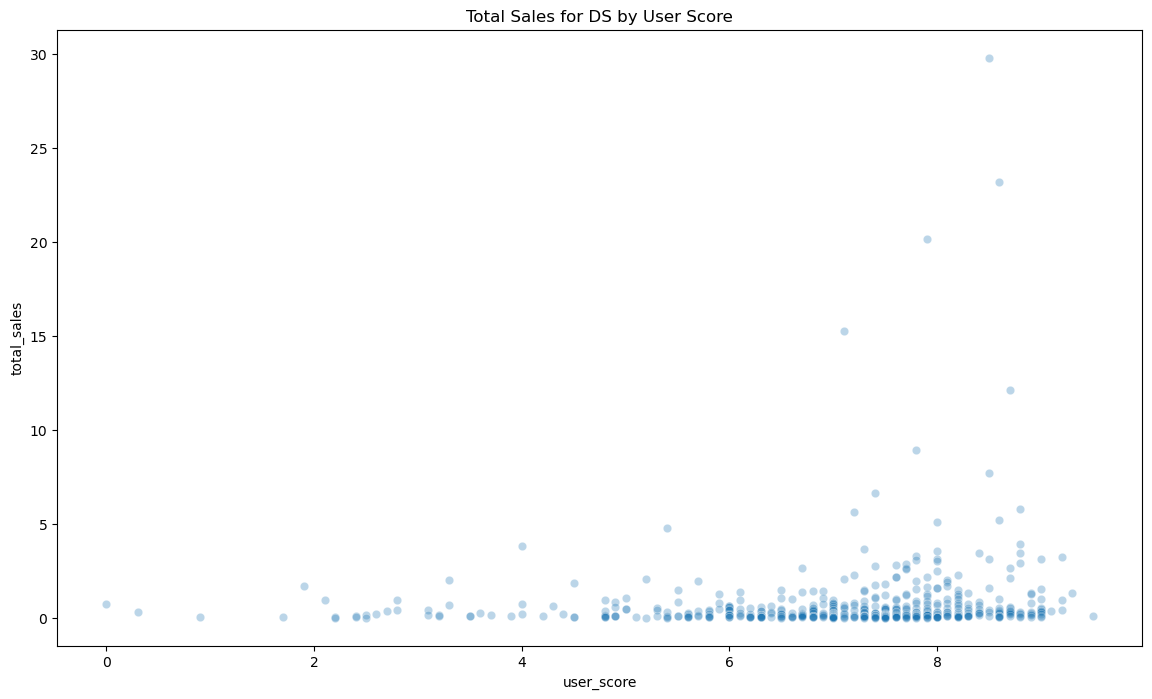

In [52]:
plt.figure(figsize=(14,8))
sns.scatterplot(data = filtered_df4, x='user_score', y='total_sales', alpha = 0.3)
plt.title("Total Sales for DS by User Score")
plt.show()

In [53]:
filtered_df4['user_score'].corr(filtered_df4['total_sales'])

0.13087600975844202

From this comparison, we can see that total sales tends to be higher with higher user score for both DS and PS2. There may be a weak positive correlation between user score and total sales.

#### 5.5.3. Critic Score and User Score vs. Total Sales

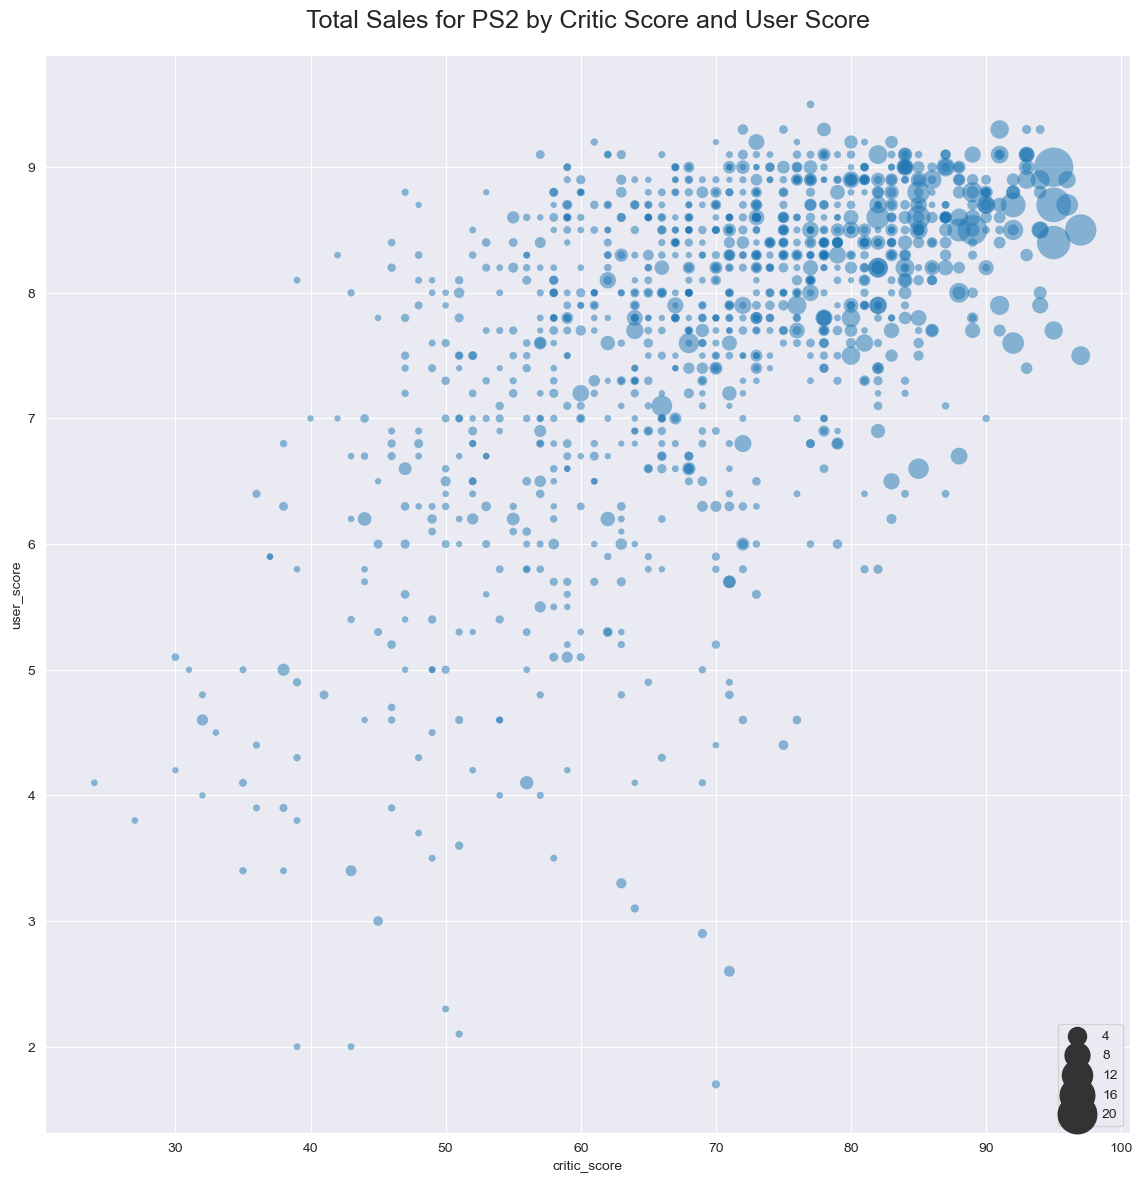

In [54]:
plt.figure(figsize=(14,14))
sns.set_style('darkgrid')
sns.scatterplot(data = filtered_df5, x = 'critic_score', y = 'user_score',
                size = 'total_sales', sizes=(20, 800), alpha = 0.5, edgecolor='none')
plt.title("Total Sales for PS2 by Critic Score and User Score", fontsize = 18, pad=20)
plt.legend(loc=4)
plt.show()

In [55]:
filtered_df5['std_critic_score'].corr(filtered_df5['std_user_score'])

0.565841244380972

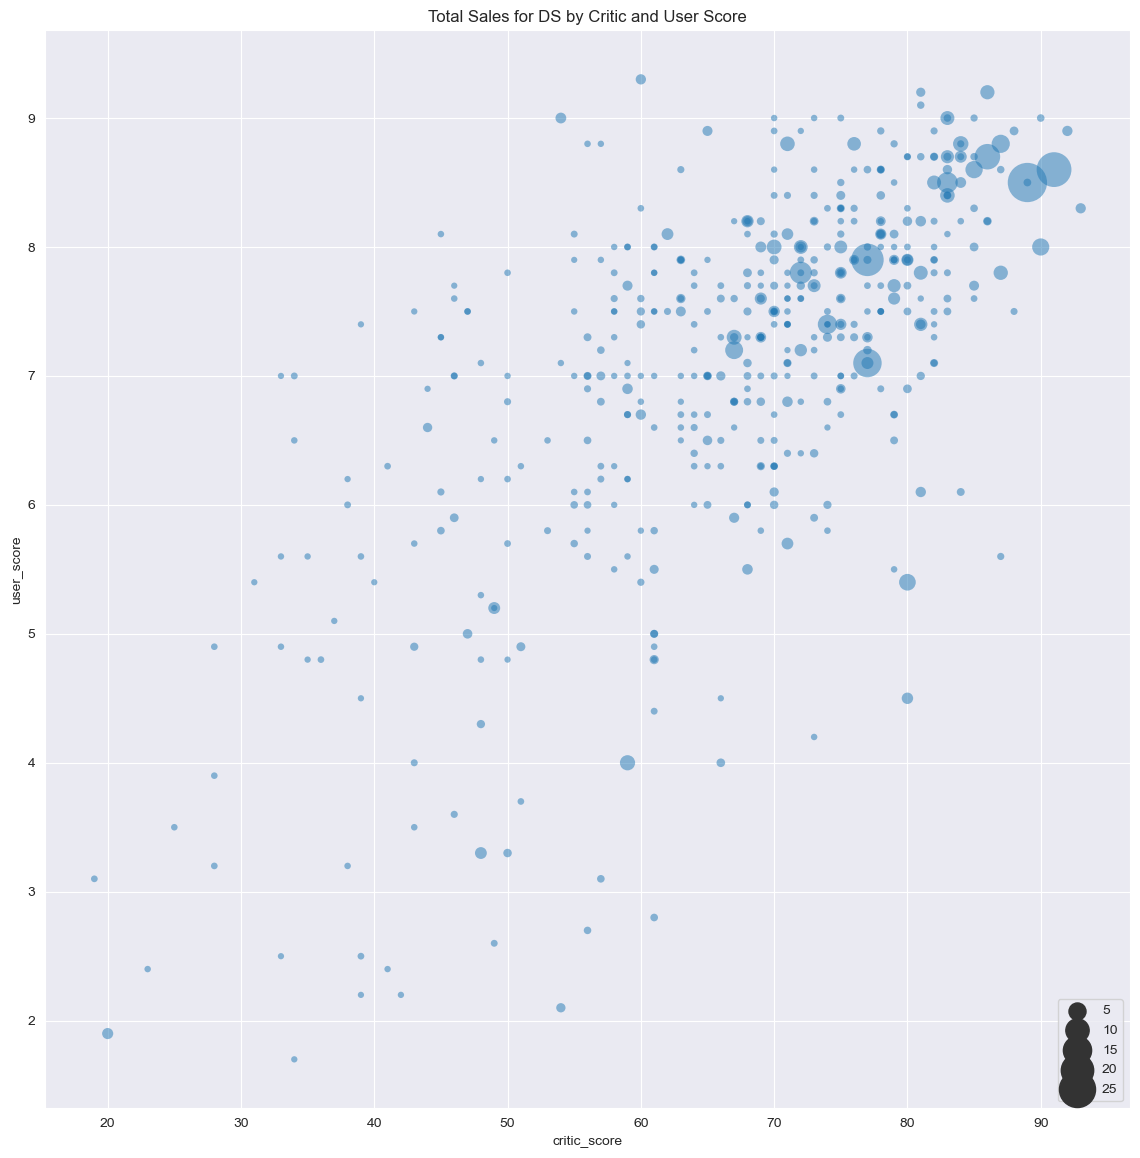

In [56]:
plt.figure(figsize=(14,14))
sns.set_style('darkgrid')
sns.scatterplot(data = filtered_df6, x = 'critic_score', y = 'user_score',
                size = 'total_sales', sizes=(20, 800), alpha = 0.5, edgecolor='none')
plt.title("Total Sales for DS by Critic and User Score")
plt.legend(loc=4)
plt.show()

In [57]:
filtered_df6['std_critic_score'].corr(filtered_df6['std_user_score'])

0.6539082647783931

From this comparison, we can see that the upper right part of the chart has bigger revenue than those in lower left part of the chart. This shows that the higher the critic score and user score, the bigger the revenue generated. Furthermore, there seems to be an association between critic score and user score in which they are positively correlated. This association holds true for both PS2 and DS platforms.

[back to table of contents](#back)

## 6. Data Profiling by Region <a id='prof'></a>

### 6.1. By Platform <a id='prof1'></a>

In [58]:
df_platform = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales','total_sales']].sum()

In [59]:
df_platform['na_sales'].sort_values(ascending=False)[:5]

platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

We can see that X360 topped the sales chart in North America by a close margin with PS2. The amount of revenue generated by X360 is 595.74 million USD followed by PS2 with total 572.92 million USD generated. The difference upper and lower rank (1 and 2, 2 and 3, etc.) in sales number is approximately ranging from 10 to 90 million USD.

In [60]:
df_platform['eu_sales'].sort_values(ascending=False)[:5]

platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

We can see that PS2 topped the sales chart in Europe by a close margin with PS3. The amount of revenue generated by PS2 is 332.63 million USD followed by PS3 with total 327.21 million USD generated. The difference upper and lower rank (1 and 2, 2 and 3, etc.) in sales number is approximately ranging from 10 to 60 million USD.

In [61]:
df_platform['jp_sales'].sort_values(ascending=False)[:5]

platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64

We can see that DS topped the sales chart in Japan by quite a large margin with PS. The amount of revenue generated by DS is 175.02 million USD followed by PS with total 139.78 million USD generated. The difference upper and lower rank (1 and 2, 2 and 3, etc.) in sales number is approximately ranging from 2 to 35 million USD.

In [62]:
df_platform['other_sales'].sort_values(ascending=False)[:5]

platform
PS2     190.47
PS3     134.59
X360     84.88
Wii      77.71
DS       59.04
Name: other_sales, dtype: float64

We can see that PS2 topped the sales chart in other regions by quite a large margin with PS3. The amount of revenue generated by PS2 is 190.47 million USD followed by PS3 with total 134.59 million USD generated. The difference upper and lower rank (1 and 2, 2 and 3, etc.) in sales number is approximately ranging from 7 to 56 million USD.

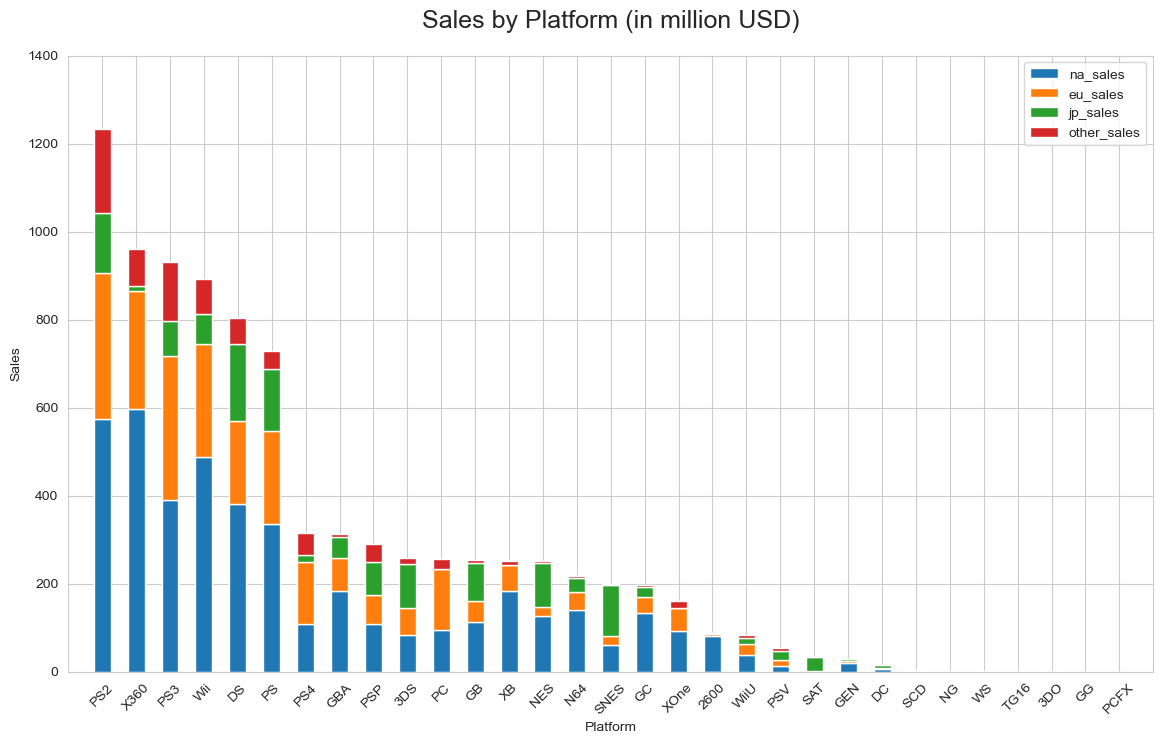

In [63]:
f = df_platform.sort_values(by='total_sales', ascending=False).reset_index()

sns.set_style('whitegrid')
g = f.plot(kind='bar', x='platform', y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], figsize=(14,8), stacked=True)

plt.axis([-1,31,0,1400])
plt.title("Sales by Platform (in million USD)", fontsize = 18, pad=20)
plt.xlabel("Platform")
plt.ylabel("Sales")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

Most of the platforms have sales volume that is largely composed by North America region which dominated almost half of the pie. It is then followed by Europe region, Japan region, and other regions accordingly.

[back to table of contents](#back)

### 6.2. By Genre <a id='prof2'></a>

In [64]:
df_genre = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales','total_sales']].sum()

In [65]:
df_genre['na_sales'].sort_values(ascending=False)[:5]

genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64

We can see that Action genre topped the sales chart in North America by quite a large margin with Sports genre. The amount of revenue generated by Action genre is 863.17 million USD followed by Sports genre with total 671.20 million USD generated. The difference upper and lower rank (1 and 2, 2 and 3, etc.) in sales number is approximately ranging from 40 to 190 million USD.

In [66]:
df_genre['eu_sales'].sort_values(ascending=False)[:5]

genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64

We can see that Action genre topped the sales chart in Europe by quite a large margin with Sports genre. The amount of revenue generated by Action genre is 510.99 million USD followed by Sports genre with total 371.33 million USD generated. The difference upper and lower rank (1 and 2, 2 and 3, etc.) in sales number is approximately ranging from 14 to 140 million USD.

In [67]:
df_genre['jp_sales'].sort_values(ascending=False)[:5]

genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64

We can see that Role-Playing genre topped the sales chart in Japan by quite a large margin with Action genre. The amount of revenue generated by Role-Playing genre is 353.39 million USD followed by Action genre with total 160.14 million USD generated. The difference upper and lower rank (1 and 2, 2 and 3, etc.) in sales number is approximately ranging from 4 to 190 million USD.

In [68]:
df_genre['other_sales'].sort_values(ascending=False)[:5]

genre
Action     182.22
Sports     132.21
Shooter    103.33
Racing      75.51
Misc        73.10
Name: other_sales, dtype: float64

We can see that Action genre topped the sales chart in other regions by quite a large margin with Sports genre. The amount of revenue generated by Action genre is 182.22 million USD followed by Sports genre with total 132.21 million USD generated. The difference upper and lower rank (1 and 2, 2 and 3, etc.) in sales number is approximately ranging from 2.5 to 50 million USD.

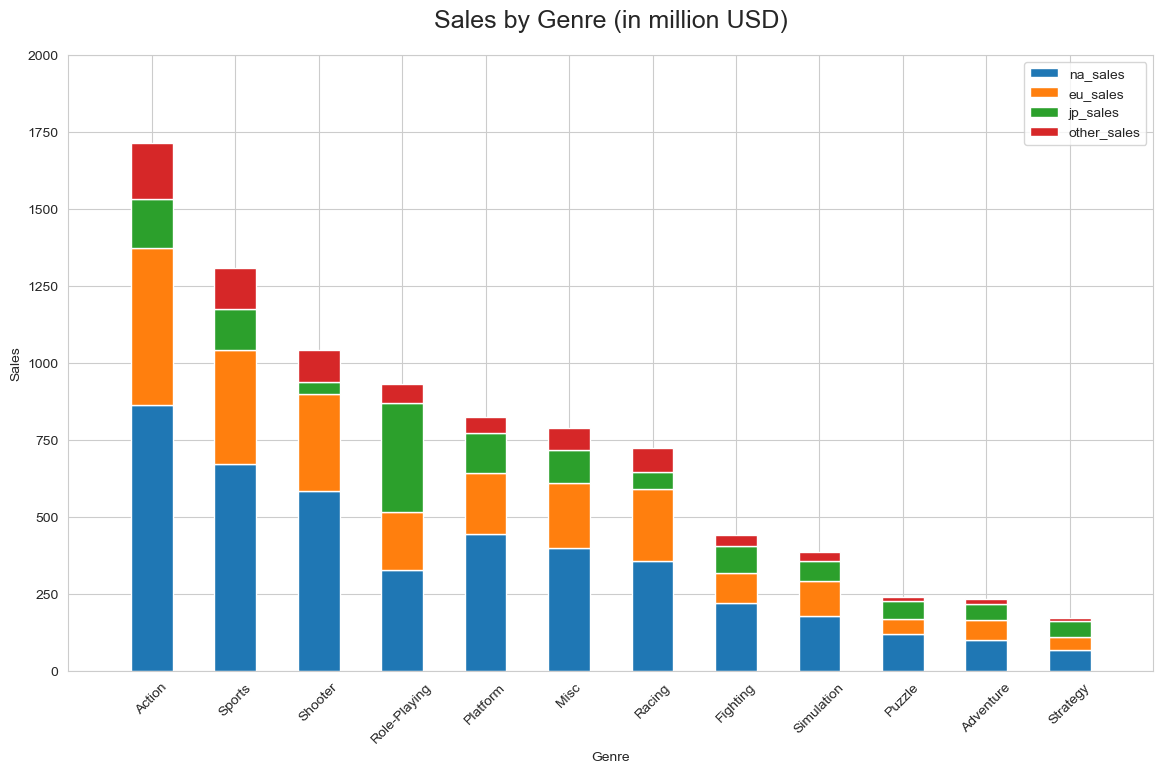

In [69]:
f = df_genre.sort_values(by='total_sales', ascending=False).reset_index()

sns.set_style('whitegrid')
g = f.plot(kind='bar', x='genre', y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], figsize=(14,8), stacked=True)

plt.axis([-1,12,0,2000])
plt.title("Sales by Genre (in million USD)", fontsize = 18, pad=20)
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

Most of the genres have sales volume that is largely composed by North America region which dominated almost half of the pie. It is then followed by Europe region, Japan region, and other regions accordingly.

[back to table of contents](#back)

### 6.3. ESRB Rating vs. Sales Amounts <a id='prof3'></a>

In [70]:
df_rating = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales','total_sales']].sum()
df_rating

,na_sales,eu_sales,jp_sales,other_sales,total_sales
rating,,,,,
AO,1.26,0.61,0.00,0.09,1.96
E,1274.24,703.87,197.96,231.54,2407.61
E10+,345.50,183.35,40.20,71.93,640.98
EC,1.53,0.11,0.00,0.11,1.75
K-A,2.56,0.27,1.46,0.03,4.32
M,742.89,480.00,63.58,176.06,1462.53
RP,0.00,0.03,0.00,0.01,0.04
T,747.60,421.79,150.70,152.99,1473.08


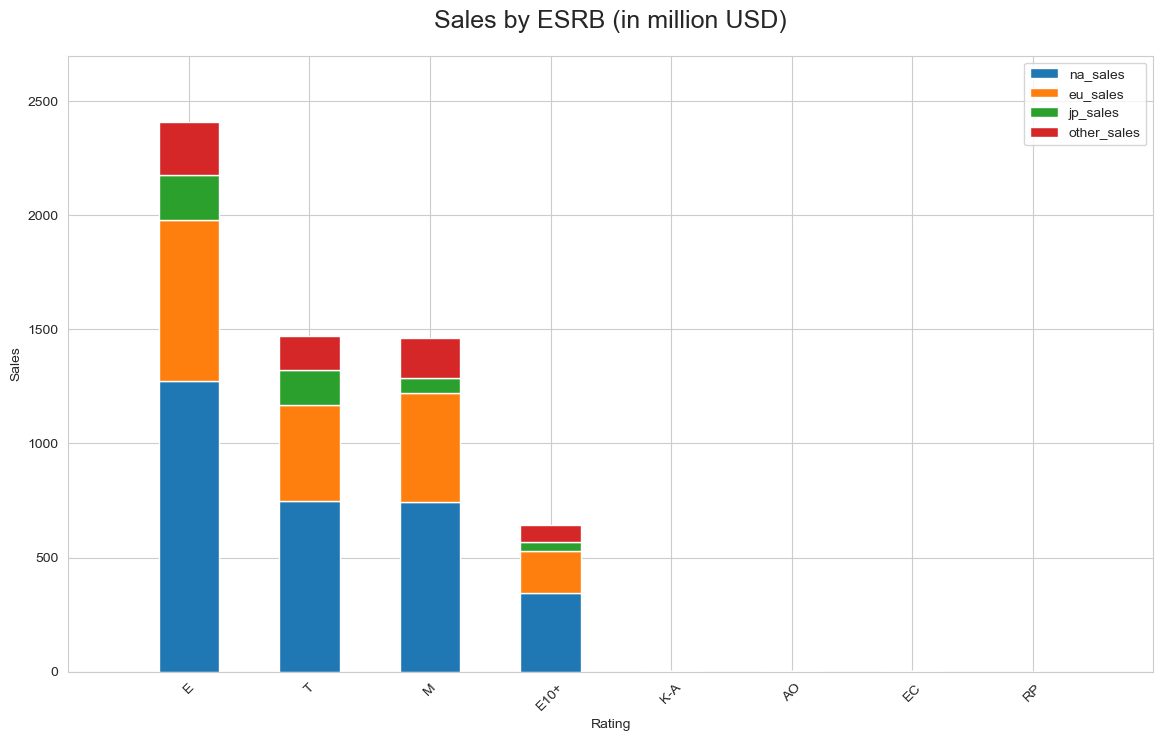

In [71]:
f = df_rating.sort_values(by='total_sales', ascending=False).reset_index()

sns.set_style('whitegrid')
g = f.plot(kind='bar', x='rating', y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], figsize=(14,8), stacked=True)

plt.axis([-1,8,0,2700])
plt.title("Sales by ESRB (in million USD)", fontsize = 18, pad=20)
plt.xlabel("Rating")
plt.ylabel("Sales")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

ESRB rating seems to have influence in the number of sales in each region. Everyone rating topped the sales in every region. Then it is followed by teen rating in North America and Japan, and mature rating in Europe and other regions.

[back to table of contents](#back)

## 7. Hypothesis Testing <a id='ht'></a>

For this test, we will use the data where user score is not null and the year of release is between 1993 and 2016. 

In [72]:
filtered_df7 = df.query("user_score.notnull() and 1993 <= year_of_release <= 2016")

For the subsequent hypothesis testing, we will use 5% level of significance because it is the most balanced level to accomodate for type I and type II error. Also because there is no urgency to reject or failing to reject null hypothesis.

In [73]:
alpha = 0.05

### 7.1. Difference in User Rating for Xbox One and PC

Assuming the dataset is random, normal, and independent, we will perform 2 tailed t-test hypothesis testing to compare user rating in Xbox One and PC.<br>The null and alternative hypothesis are stated as below:<br>
H0: User rating for Xbox One and PC are the same.<br>
H1: User rating for Xbox One and PC are the different.

In [74]:
results = st.ttest_ind(filtered_df7[filtered_df7['platform'] == 'XOne']['user_score'],
                       filtered_df7[filtered_df7['platform'] == 'PC']['user_score'])

print("p-value:", results.pvalue)

if results.pvalue < alpha:
    print("Reject H0. There is a strong evidence that user rating for Xbox One and PC are the different.")
else:
    print("Fail to reject H0. There is not enough evidence to say that user rating for Xbox One and PC are the different.")

p-value: 9.379956219356061e-06
Reject H0. There is a strong evidence that user rating for Xbox One and PC are the different.


In this test, there is a strong evidence that user rating for Xbox One and PC are the different.

### 7.2. Difference in User Rating for Action and Sports

Assuming the dataset is random, normal, and independent, we will perform 2 tailed t-test hypothesis testing to compare user rating in Action and Sports.<br>The null and alternative hypothesis are stated as below:<br>
H0: User Rating for Action and Sports are the same.<br>
H1: User Rating for Action and Sports are the different.

In [75]:
results = st.ttest_ind(filtered_df7[filtered_df7['genre'] == 'Action']['user_score'],
                       filtered_df7[filtered_df7['genre'] == 'Sports']['user_score'])

print("p-value:", results.pvalue)

if results.pvalue < alpha:
    print("Reject H0. There is a strong evidence that user rating for Action and Sports are the different.")
else:
    print("Fail to reject H0. There is not enough evidence to say that user rating for Action and Sports are the different.")

p-value: 0.06480928064420527
Fail to reject H0. There is not enough evidence to say that user rating for Action and Sports are the different.


In this test, there is not enough evidence to say that user rating for Action and Sports are the different.

[back to table of contents](#back)

## 8. General Conclusion <a id='end'></a>

The initial data exploration shows that there are **6 columns with missing data** and **1 column with wrong datatype**. Three of the columns with missing data (name, year_of_release, and genre) are cleaned using **listwise deletion** method because the percentage of missing data is small (below 1.7%). In order to preserve information, the remaining columns with missing data are treated with **pairwise deletion** because the number of missing data is large (more than 40%). Outliers are only removed when performing hypothesis testing so that the data analyzed before that is most informative. The dataset is then improved by adding 3 derived variables which are **total_sales, standardized_critic_score, and standardized_user_score**.<br><br>
The analysis performed shows that the number of games released each year differ significantly ranging from 9 games in the year 1980 to 1427 games in 2008. It shows that there is a steady **increase** in the number of games from **1980 until 2008** and then followed by a **decrease** from **2008 until 2016**. There is only a noted increase in the number of games released since 1990. The number of games sold differ significantly between each platform. In terms of transition, these platforms showed a stark transition consecutively:
* PS1, PS2, PS3, and PS4.
* Nintendo N64, GBA, DS, and 3DS.
* Nintendo Wii and WiiU.
* Xbox, Xbox 360, and Xbox One. <br>

It typically takes as long as 6 until 9 years for a platform to outshines its predecessor. <br><br>
Based on the heatmap generated, we can see that there are only several platform left that seems to be active which are **PS4, 3DS, and XOne**. PS4 seems to be still popular, and both 3DS and XOne seems to be decreasing in terms of sales generated. For the subsequent years, **PS4 is the platform of choice that will optimize profit** though it may also be reasonable to release some games on 3DS or XOne to gain additional revenue. <br><br>
The distribution of the most popular platform, PS2, shows that there are many games that generate way more revenue than the typical. Based on the analysis conducted, we could use the period from **1993 to 2016** to forecast the future. There are significant difference in revenue generated by each genre. The revenue generated per genre ranging from 172.57 million USD for **Strategy genre** to 1716.52 million USD for **Action genre**.<br><br>
There may be a weak positive correlation between **critic score** and **total sales**. There is also a weak positive correlation between **user score** and **total sales**. The analysis shows that higher critic score and user score generate **bigger revenue**. Furthermore, there seems to be an association between critic score and user score in which they are **positively correlated**. This association holds true for both PS2 and DS platforms. <br><br>
Most of the platforms have sales volume that is largely composed by North America region which dominated almost half of the pie. It is then followed by Europe region, Japan region, and other regions accordingly. This also hold true when we compare genre with sales volume. ESRB rating seems to have influence in the number of sales in each region with *everyone* rating topped the sales in every region. Lastly, based on the hypothesis testing conducted, there is a strong evidence that user rating for Xbox One and PC are the different. However, there is not enough evidence to say that user rating for Action and Sports are the different. <br><br>


[back to table of contents](#back)